In [98]:
#for data manipulation
import pandas as pd 
import numpy as np
#for data visualization
import matplotlib.pyplot as plt
import seaborn as sns

In [51]:
#read data
df = pd.read_csv('/Users/sultanahaldawsari/Desktop/results1.csv')

# Data Exploring and Cleaning

In [52]:
df.head()

,year,global_temp,local_temp
0,1843,8.17,24.74
1,1844,7.65,15.45
2,1845,7.85,20.82
3,1846,8.55,NaN
4,1847,8.09,NaN


In [53]:
df.dropna(inplace=True)

In [54]:
df.describe()

,year,global_temp,local_temp
count,169.000000,169.000000,169.000000
mean,1928.964497,8.539349,25.214142
std,48.991483,0.465991,1.046984
min,1843.000000,7.560000,15.450000
25%,1887.000000,8.180000,24.870000
50%,1929.000000,8.520000,25.150000
75%,1971.000000,8.760000,25.590000
max,2013.000000,9.730000,27.780000


# Calculating the Moving Average 

In [57]:
df['global_temp'] =df['global_temp'].rolling(14).mean()
df['local_temp'] =df['local_temp'].rolling(14).mean() #used by 14 to smoothens the data for better understanding

In [70]:
dfm = df.melt('year', var_name='cols', value_name='vals') # create a new df to simplify the visualization part and to eazy compare

In [71]:
dfm

,year,cols,vals
0,1843,global_temp,NaN
1,1844,global_temp,NaN
2,1845,global_temp,NaN
3,1848,global_temp,NaN
4,1849,global_temp,NaN
...,...,...,...
333,2009,local_temp,26.415714
334,2010,local_temp,26.493571
335,2011,local_temp,26.558571
336,2012,local_temp,26.565714


# Visualization

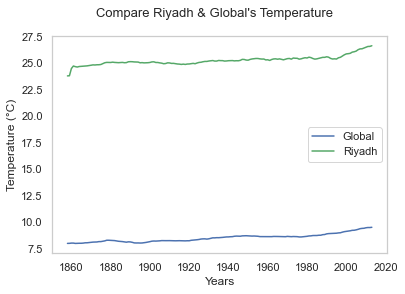

In [97]:
p = sns.lineplot(data=dfm, x="year", y="vals", hue='cols', palette=['b', 'g'])
p.legend(title='', loc='center right', labels=['Global', 'Riyadh'])
p.figure.suptitle("Compare Riyadh & Global's Temperature", fontsize = 13)
p.set(xlabel="Years", ylabel = "Temperature (°C)");

In [99]:
p.figure.savefig("output.png")